<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2025<br>
<font color=3C99D size=5>
Practical Assignment 1 - Search <br>
<font color=696880 size=4>
Amir Homayoon sharifi zade

____________

In [ ]:
#insert your information
NAME = 'Pardis Moradi'
STUDENT_NUMBER = '402106489'

# Libraries

In [4]:
import random
import heapq
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque
import time
from itertools import combinations

# **Uninformed Search**

In this part you are going to implement the famous algorithms of graph search on some random graph.
At first you will implement DFS, after that BFS will be implemented and finally you'll implement some heuristic and preform A*.
Here are some helper functions to generate and plot the graph. Do not touch the code in the below cells and only complete the parts with a TODO hashtag.

In [ ]:
# Create a random graph with blocked edges (None means blocked)
def generate_random_graph(n, edge_probability=0.1, max_weight=10):
    graph = {i: {} for i in range(n)}
    for node in range(n):
        for neighbor in range(node + 1, n):
            if random.random() < edge_probability:  # Edge exists with given probability
                weight = random.randint(1, max_weight)
                graph[node][neighbor] = weight
                graph[neighbor][node] = weight
    return graph

In [ ]:
def plot_graph(graph, path=None, explored=None):
    # Create a fixed layout using networkx's spring layout (force-directed)
    G = nx.Graph(graph)

    # Fixed layout (positions determined from the graph)
    pos = nx.spring_layout(G, seed=42)  # Ensures the same layout every time

    # Draw edges
    fig, ax = plt.subplots(figsize=(8, 8))
    nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray', width=1.5)  # Draw all edges in gray

    # Draw nodes (default color for non-explored and non-path nodes)
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightgreen', label="Nodes")

    # Highlight the explored nodes
    if explored:
        nx.draw_networkx_nodes(G, pos, nodelist=explored, node_size=300, node_color='blue', label="Explored")

    # Highlight the path nodes
    if path:
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_size=300, node_color='red', label="Path")

    # Add labels for the nodes
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', font_color='black')

    # Add the legend
    ax.legend()

    ax.set_title("Graph Visualization")
    plt.axis('off')  # Turn off the axis for a cleaner visualization
    plt.show()


# DFS

In [ ]:
def dfs(graph, start, goal):
    #return the "path" which is a list of nodes in path and the "explored" which is list of nodes who are explored
    explored = set() # if v (not) in explored # explored.add(v)
    fringe = deque([(start, None)]) # append(), appendleft(), pop(), popleft()
    parent_map = {}
    while fringe:
      top, parent = fringe.pop()
      if top in explored:
        continue
      explored.add(top)
      parent_map[top] = parent
      if top == goal:
        path = deque()
        while top is not None:
          path.appendleft(top)
          top = parent_map[top]
        return list(path), list(explored)
      for neighbor in reversed(graph[top].keys()):
        if neighbor not in explored:
          fringe.append((neighbor, top))
    # in case of failure
    return None, list(explored)


# BFS

In [ ]:
def bfs(graph, start, goal):
    #return the "path" which is a list of nodes in path and the "explored" which is list of nodes who are explored
    explored = set()
    fringe = deque([(start, None)])
    parent_map = {}
    while fringe:
      top, parent = fringe.popleft()
      if top in explored:
        continue
      explored.add(top)
      parent_map[top] = parent
      if top == goal:
        path = deque()
        while top is not None:
          path.appendleft(top)
          top = parent_map[top]
        return list(path), list(explored)
      for neighbor in graph[top].keys():
        if neighbor not in explored:
          fringe.append((neighbor, top))
    return None, list(explored)


**So far, we have explored two uninformed search methods: DFS, BFS. Briefly explain the advantages and disadvantages of each method in the context of the Maze Problem and compare their performance based on your observations (consider both time and memory).**

DFS Pros:

* Good when the goal state is deep in the search tree
* Uses much less memory (around O(bm), where b is the branching factor and m is the maximum depth)
* Can be faster if the solution happens to be along the first explored path
* Easy to implement with recursion or an explicit stack

DFS Cons:

* May get stuck in loops or infinite states if cycles are not handled
* The solution is not necessarily optimal, as it might find a longer path before the shortest one
* Can go deep unnecessarily, making it inefficient for very large or infinite state spaces

BFS Pros:

* Guaranteed to find the shortest path in an unweighted maze
* Doesn't get stuck in loops
* Works well when the solution is close to the starting point

BFS Cons:

* High memory usage (around O(bᵈ))
* Can be much slower in large mazes since it explores every possible path at each level before proceeding

### Time/Space Complexity of DFS at worst case: O(bᵐ)/O(bm)

### Time/Space Complexity of BFS at worst case: O(bᵈ)/O(bᵈ)



# A star


In [ ]:
# Define heuristic functions
# A* Search (using simple heuristics: Manhattan distance or random)
def manhattan_distance(a, b, pos):
    x_a, y_a = pos[a]
    x_b, y_b = pos[b]
    return abs(x_a - x_b) + abs(y_a - y_b)

# Random heuristic
def random_heuristic(a, b, pos):
    return random.randint(1, 10)  # Random heuristic for demonstration

def a_star(graph, start, goal, heuristic, pos):
    #return the "path" which is a list of nodes in path and the "explored" which is list of nodes who are explored
    explored = set()
    fringe = []
    heapq.heappush(fringe, (heuristic(start, goal, pos), 0, start, None))
    parent_map = {}
    g_score = {node: float('inf') for node in graph}
    g_score[start] = 0
    while fringe:
      f_top, g_top, top, parent = heapq.heappop(fringe)
      if top in explored:
        continue
      explored.add(top)
      parent_map[top] = parent
      if top == goal:
        path = deque()
        while top is not None:
          path.appendleft(top)
          top = parent_map[top]
        return list(path), list(explored)
      for neighbor, weight in graph[top].items():
        tentative_g = g_top + weight
        if tentative_g < g_score[neighbor]:
          g_score[neighbor] = tentative_g
          f_score = tentative_g + heuristic(neighbor, goal, pos)
          heapq.heappush(fringe, (f_score, tentative_g, neighbor, top))
    return None, list(explored)


# Results

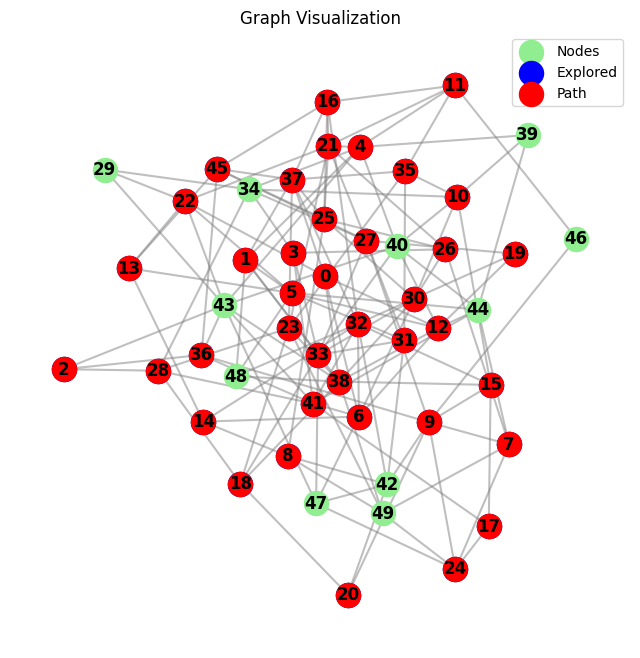

DFS Path: [0, 6, 12, 5, 1, 4, 11, 16, 21, 22, 13, 14, 8, 25, 26, 3, 33, 18, 20, 9, 7, 24, 17, 15, 10, 30, 38, 23, 28, 2, 36, 41, 32, 19, 27, 31, 35, 37, 45]


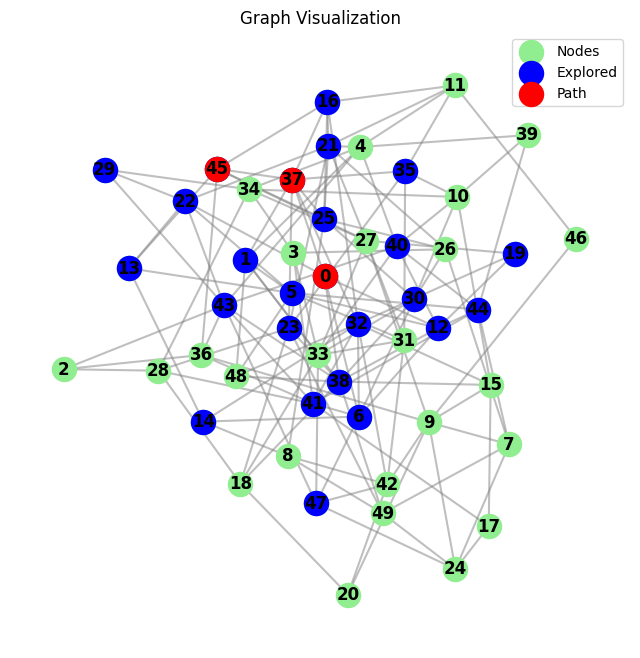

BFS Path: [0, 37, 45]


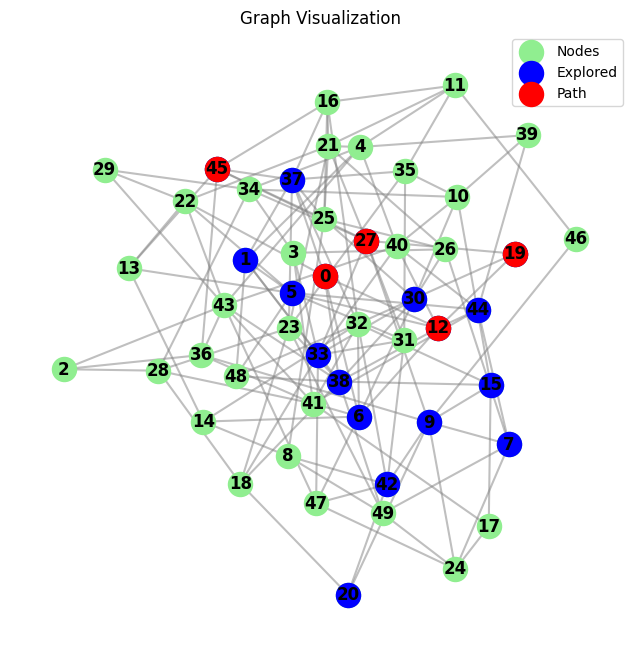

A* Path with Random Heuristic: [0, 12, 19, 27, 45]


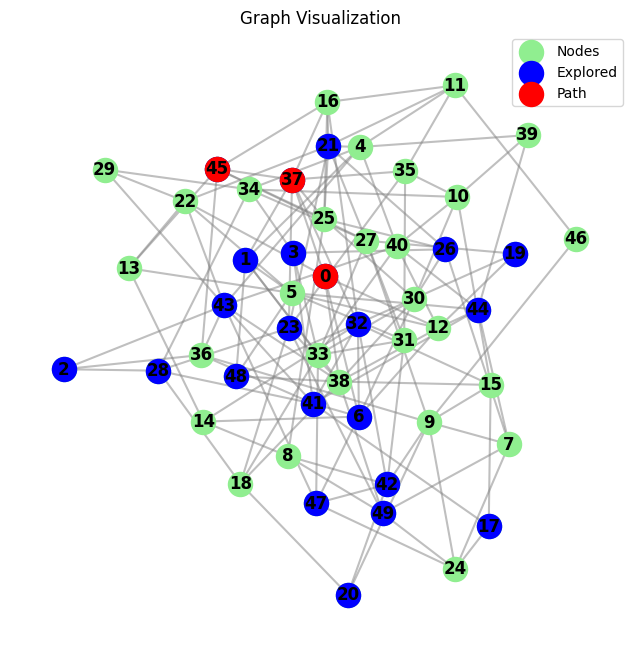

A* Path with Manhattan Distance Heuristic: [0, 37, 45]


In [ ]:
# Parameters
num_nodes = 50  # Number of nodes in the graph
start_node = 0  # Starting node
goal_node = 45   # Goal node

# Generate random graph
random_graph = generate_random_graph(num_nodes)

# # Get random node positions for Manhattan distance calculation
positions = {i: (random.randint(0, 100), random.randint(0, 100)) for i in range(num_nodes)}

# Run DFS
path_dfs, explored_dfs = dfs(random_graph, start_node, goal_node)
plot_graph(random_graph, path=path_dfs, explored=explored_dfs)
print(f"DFS Path: {path_dfs}")

# Run BFS
path_bfs, explored_bfs = bfs(random_graph, start_node, goal_node)
plot_graph(random_graph, path=path_bfs, explored=explored_bfs)
print(f"BFS Path: {path_bfs}")

# Run A* with Random Heuristic in same manner as above
path_a_star_random, explored_a_star_random = a_star(random_graph, start_node, goal_node, random_heuristic,positions)
plot_graph(random_graph, path=path_a_star_random, explored=explored_a_star_random)
print(f"A* Path with Random Heuristic: {path_a_star_random}")

# Run A* with Manhattan Distance Heuristic
path_a_star_manhattan, explored_a_star_manhattan = a_star(random_graph, start_node, goal_node, manhattan_distance ,positions)
plot_graph(random_graph, path=path_a_star_manhattan, explored=explored_a_star_manhattan)
print(f"A* Path with Manhattan Distance Heuristic: {path_a_star_manhattan}")


**Explain your heuristic and observation's result. Also, compare the A\* method with Uninformed search in the context of the problem.**

The first heuristic was assigned randomly to each state, making it inconsistent and providing no guarantee of an optimal solution, which is exactly what happened in the samples above.

The second heuristic, based on the Manhattan distance, is consistent. Since consistency in graph search is both a necessary and sufficient condition for finding the optimal solution, A* successfully found the best path, as seen in the sample.

Comparing BFS and DFS with A*, DFS explored many states but failed to find the optimal solution. BFS did find it but checked more states due to its uninformed nature, ignoring path cost estimates. In contrast, A* leveraged heuristic guidance for better pruning, leading to more efficient memory and time usage.

# **Weigted Graph**

In this part we are going to explore a situation in which every vertice has some cost and we want to minimize the cost as well. So one can say that the part before was a special kind of Weighted Graph with weights equal to 1 in every vertice.
Again the two cells below are helper functions that should not be modified.

In [ ]:
# Create a random graph with weights on edges
def generate_weighted_graph(n, edge_probability=0.1, max_weight=10):
    graph = {i: {} for i in range(n)}

    for node in range(n):
        for neighbor in range(node + 1, n):
            if random.random() < edge_probability:  # Edge exists with given probability
                weight = random.randint(1, max_weight)
                graph[node][neighbor] = weight
                graph[neighbor][node] = weight  # Undirected graph
    return graph


In [ ]:
def plot_graph(graph, path=None, explored=None):
    # Create a fixed layout using networkx's spring layout (force-directed)
    G = nx.Graph(graph)

    # Fixed layout (positions determined from the graph)
    pos = nx.spring_layout(G, seed=42)  # Ensures the same layout every time

    # Draw edges
    fig, ax = plt.subplots(figsize=(8, 8))
    nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray', width=1.5)  # Draw all edges in gray

    # Draw nodes (default color for non-explored and non-path nodes)
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightgreen', label="Nodes")

    # Highlight the explored nodes
    if explored:
        nx.draw_networkx_nodes(G, pos, nodelist=explored, node_size=300, node_color='blue', label="Explored")

    # Highlight the path nodes
    if path:
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_size=300, node_color='red', label="Path")

    # Add labels for the nodes
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', font_color='black')

    # Display edge weights (weights on the edges)
    edge_labels = {(u, v): graph[u][v] for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='blue')

    # Add the legend
    ax.legend()

    ax.set_title("Graph Visualization with Weights")
    plt.axis('off')  # Turn off the axis for a cleaner visualization
    plt.show()


# DFS With Cost

In [ ]:
# Depth-First Search (DFS) with weight sum
def dfs_weighted(graph, start, goal):
    #returns the path(list) and weight_sum(int) and explored(list)
    #Reconstruct the path and calculate the weight sum
    explored = set() # if v (not) in explored # explored.add(v)
    fringe = deque([(start, None)]) # append(), appendleft(), pop(), popleft()
    parent_map = {}
    while fringe:
      top, parent = fringe.pop()
      if top in explored:
        continue
      explored.add(top)
      parent_map[top] = parent
      if top == goal:
        path = deque()
        weight_sum = 0
        while top != start:
          weight_sum += graph[top][parent_map[top]]
          path.appendleft(top)
          top = parent_map[top]
        path.appendleft(start)
        return list(path), weight_sum, list(explored)
      for neighbor in reversed(graph[top].keys()):
        if neighbor not in explored:
          fringe.append((neighbor, top))
    # in case of failure
    return None, -1, list(explored)


# BFS With Cost

In [ ]:
# Breadth-First Search (BFS) with weight sum
def bfs_weighted(graph, start, goal):
    #TODO: implement BFS search
    #returns the path(list) and weight_sum(int) and explored(list)
    #Reconstruct the path and calculate the weight sum
    explored = set()
    fringe = deque([(start, None)])
    parent_map = {}
    while fringe:
      top, parent = fringe.popleft()
      if top in explored:
        continue
      explored.add(top)
      parent_map[top] = parent
      if top == goal:
        path = deque()
        weight_sum = 0
        while top != start:
          weight_sum += graph[top][parent_map[top]]
          path.appendleft(top)
          top = parent_map[top]
        path.appendleft(start)
        return list(path), weight_sum, list(explored)
      for neighbor in graph[top].keys():
        if neighbor not in explored:
          fringe.append((neighbor, top))
    return None, -1, list(explored)

# Dijkstra (UCS)

In [ ]:
# Dijkstra's Algorithm
def dijkstra(graph, start, goal):
    # returns the path(list) and weight_sum(int) and explored(list)
    # Reconstruct the path and calculate the weight sum

    # Priority queue to hold nodes to be explored, based on their tentative distance
    # If a shorter path to the neighbor is found, update the priority queue
    # Reconstruct the path and calculate the weight sum
    explored = set()
    fringe = []
    heapq.heappush(fringe, (0, start, None))
    parent_map = {}
    g_score = {node: float('inf') for node in graph}
    g_score[start] = 0
    while fringe:
      g_top, top, parent = heapq.heappop(fringe)
      if top in explored:
        continue
      explored.add(top)
      parent_map[top] = parent
      if top == goal:
        path = deque()
        while top is not None:
          path.appendleft(top)
          top = parent_map[top]
        return list(path), g_top, list(explored)
      for neighbor, weight in graph[top].items():
        tentative_g = g_top + weight
        if tentative_g < g_score[neighbor]:
          g_score[neighbor] = tentative_g
          heapq.heappush(fringe, (tentative_g, neighbor, top))
    return None, -1, list(explored)


# Results

DFS Path: [0, 13, 4, 33, 6, 16, 14, 15, 38, 19, 23, 42, 7, 12, 2, 3, 11, 34, 9, 31, 48, 10, 30, 45]
DFS Weight Sum: 123
BFS Path: [0, 29, 43, 45]
BFS Weight Sum: 17
Dijkstra Path: [0, 29, 47, 34, 45]
Dijkstra Weight Sum: 11


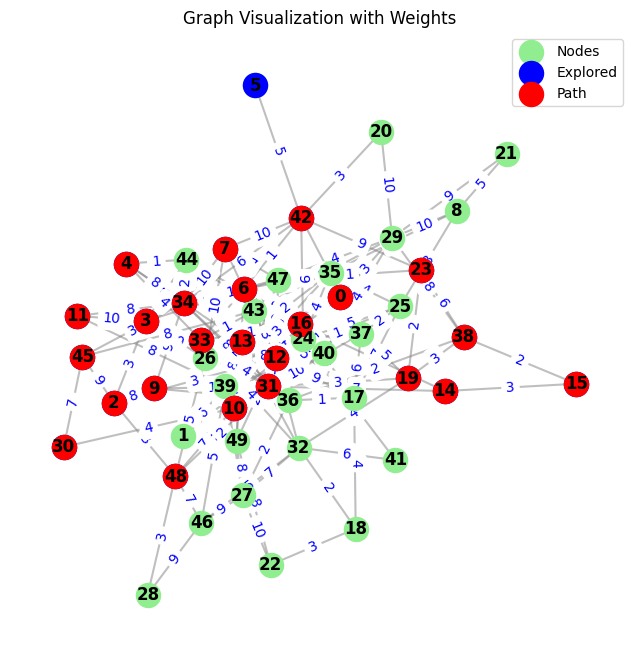

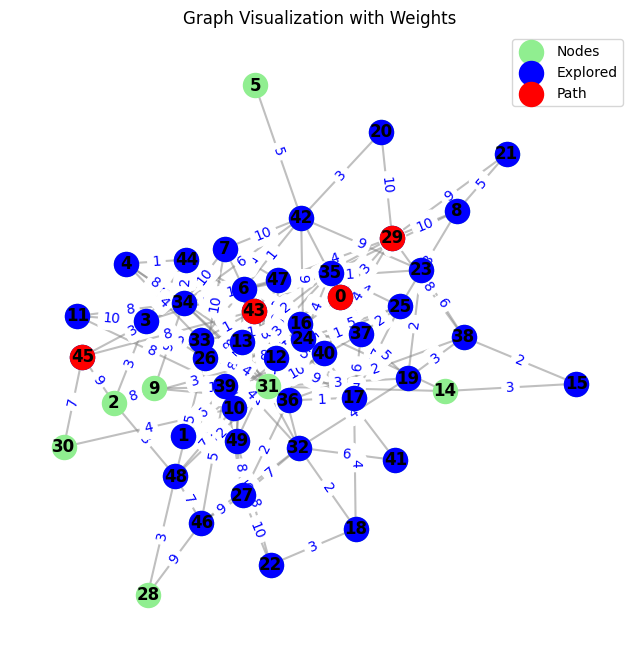

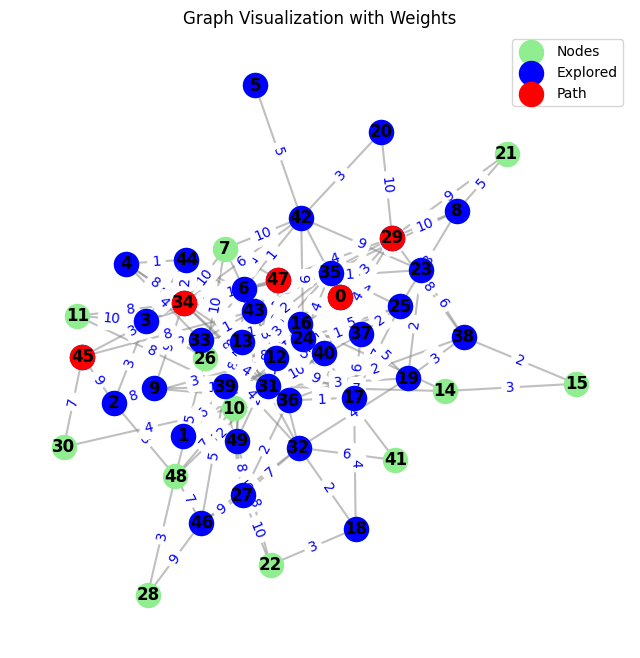

In [ ]:
# Parameters
num_nodes = 50  # Number of nodes in the graph
start_node = 0  # Starting node
goal_node = 45   # Goal node

# Generate random weighted graph
weighted_graph = generate_weighted_graph(num_nodes)

# Run DFS
path_dfs, weight_dfs, explored_dfs = dfs_weighted(weighted_graph, start_node, goal_node)
print(f"DFS Path: {path_dfs}")
print(f"DFS Weight Sum: {weight_dfs}")

# Run BFS
path_bfs, weight_bfs, explored_bfs = bfs_weighted(weighted_graph, start_node, goal_node)
print(f"BFS Path: {path_bfs}")
print(f"BFS Weight Sum: {weight_bfs}")

# Run Dijkstra
path_dijkstra, weight_dijkstra, explored_dijkstra = dijkstra(weighted_graph, start_node, goal_node)
print(f"Dijkstra Path: {path_dijkstra}")
print(f"Dijkstra Weight Sum: {weight_dijkstra}")

# Visualize the results
plot_graph(weighted_graph, path=path_dfs, explored=explored_dfs)
plot_graph(weighted_graph, path=path_bfs, explored=explored_bfs)
plot_graph(weighted_graph, path=path_dijkstra, explored=explored_dijkstra)


**What are the key diffrences between dijkstra, bfs and dfs? Which one of them has acted better in our problem and why? What happens when graph is directed?**

## Key Differences:
* DFS explores deeply before backtracking, inefficient for shortest paths. Also it doesn't at all consider the effect of weights in a weighted graph
* BFS explores level by level, guarantees shortest path only in unweighted graphs but here, it finds shortest path according to number of edges not the sum of their weights and therefore is not optimal
* Dijkstra uses a priority queue to prioritize states based on their cost from start, always finds the shortest path in weighted graphs

Dijkstra performs best as it considers edge weights, unlike BFS and DFS, which ignore them. BFS works only for unweighted graphs, and DFS is unreliable for optimal paths

They all function the same as in undirected graphs, following only allowed edges. Dijkstra remains optimal as long as weights are non-negative.

# **Local Search**

# Problem definition
In this part, you should implement **Hill-Climbing** and **Genentic** algorithms. Afterwards you will test them on a formal np problem (Subset Sum)

Suppose we have a limit for our back pack that we show with *target_sum* and random number of materials with some rand weights which are present in *nums*. To do that we will implement 3 algorithms. First, you should implement  **Hill-Climbing**, and then you should implement the **Genetic Algorithm**. At last, you should find the actual answer using **Naive Search (brute force)**.

In [ ]:
# Sample input for Subset Sum Problem
target_sum = 60
nums = [random.randint(1, 10) for _ in range(15)]  # Random list of 15 integers between 1 and 10

print(f"Numbers: {nums}")
print(f"Target Sum: {target_sum}")


Numbers: [1, 5, 2, 8, 9, 10, 5, 7, 2, 9, 2, 6, 3, 5, 2]
Target Sum: 60


# Hill Climbing

In order to implement hill climbing, you must at first define the neighbors in your model. We suggest that every addition or omition of your current bag should be a neighbor yet you can implement it how you want.

In [10]:
def hill_climbing(nums, target_sum):
    #Random initial solution (subset of nums)
    current_solution = random.sample(nums, random.randint(1, len(nums)))
    current_sum = sum(current_solution)
    #return a current solution = best state value
    #Hill climbing loop
    #Generate neighbors by adding one element or removing one element
    #Evaluate the neighbors by calculating the sum
    #If no improvement, stop
    while True:
      if current_sum == target_sum:
        return current_solution
      best_dist, best_sol = abs(current_sum - target_sum), None
      for num in nums:
        if num in current_solution:
          if abs(current_sum - num - target_sum) < best_dist:
            best_dist = abs(current_sum - num - target_sum)
            best_sol = current_solution.copy()
            best_sol.remove(num)
        else:
          if abs(current_sum + num - target_sum) < best_dist:
            best_dist = abs(current_sum + num - target_sum)
            best_sol = current_solution.copy()
            best_sol.append(num)
      if best_sol is None:
        break
      current_solution = best_sol
      current_sum = sum(current_solution)

    return current_solution

# Genetic Algorithm
As you have learned, in order to implement GA, you need to define mutation function and crossover functions(single pointed one would be enough).

Then, in main GA body, a population of random solutions (subsets) is created. These solutions evolve over a number of generations through selection, crossover, and mutation.
The algorithm aims to evolve the population towards finding a subset whose sum is as close as possible to the target sum. After a set number of generations, the algorithm returns the best solution found.

In [11]:
def tournament_selection(population, target_sum, tournament_size=5):
    tournament = random.sample(population, tournament_size)
    tournament.sort(key=lambda x: abs(target_sum - sum(x)))
    return tournament[0]  # Best solution in the tournament

def crossover(parent1, parent2):
    # Single-point crossover
    #return childs created of process (child1 and child 2)
    combination = sorted(set(parent1 + parent2))
    point = random.randint(1, len(combination) - 1)
    crossover_value = combination[point]

    child1, child2 = [], []
    for i in parent1:
        if i >= crossover_value:
            child1.append(i)
        else:
            child2.append(i)

    for i in parent2:
        if i >= crossover_value:
            child2.append(i)
        else:
            child1.append(i)

    return child1, child2

def mutate(solution, nums, mutation_rate=0.1):
    # Mutate the solution by either adding a random number from nums that isn't in solution or removing a random number from solution
    #chanced are based on mutation_rate (when your chance is less that rate it will happen)
    #return the mutated solution.
    if random.random() < mutation_rate:
      randnum = nums[random.randint(0, len(nums) - 1)]
      if randnum in solution:
        solution.remove(randnum)
      else:
        solution.append(randnum)
    return solution


In [12]:
def genetic_algorithm(nums, target_sum, population_size=50, generations=100, mutation_rate=0.1):
    # Random initial population
    population = [random.sample(nums, random.randint(1, len(nums))) for _ in range(population_size)]
    # Sort the population by fitness and select the best solution; if it matches the target, return it.
    # Use tournament selection, crossover, and mutation to create the next generation until the population size is met.
    for _ in range(generations):
      population.sort(key=lambda x: abs(target_sum - sum(x)))

      if sum(population[0]) == target_sum:
        return population[0]

      new_population = []

      while len(new_population) < population_size:
        # Select parents
        parent1 = tournament_selection(population, target_sum)
        parent2 = tournament_selection(population, target_sum)

        # Crossover
        child1, child2 = crossover(parent1, parent2)

        # Mutation
        child1 = mutate(child1, nums, mutation_rate)
        child2 = mutate(child2, nums, mutation_rate)

        # Add new children to the population
        new_population.extend([child1, child2])

      population = new_population[:population_size]

    population.sort(key=lambda x: abs(target_sum - sum(x)))
    return population[0]  # Return the best solution after all generations


# Brute Force

In [13]:
def brute_force(nums, target_sum):
    best_sol_idx = 0
    best_solution = []
    best_sum = float('inf')
    for mask in range(1 << len(nums)):
      current_sum = 0
      for i in range(len(nums)):
        if mask & (1 << i):
          current_sum += nums[i]
      if abs(current_sum - target_sum) < best_sum:
        best_sum = abs(current_sum - target_sum)
        best_sol_idx = mask
      if best_sum == 0:
        break

    for i in range(len(nums)):
      if best_sol_idx & (1 << i):
        best_solution.append(nums[i])

    return best_solution


# Comparison

Run the 3 algorithms 10 times and watch the result. Hill climbing and Genetic Algorithm results should be close to actual answers(brute force results).


In [14]:
# Running the algorithms multiple times with different random setups
def run_multiple_trials(num_trials=10):
    hill_climbing_times = []
    ga_times = []
    brute_force_times = []

    hill_climbing_solutions = []
    ga_solutions = []
    brute_force_solutions = []

    for i in range(num_trials):
        # Generate random setup for each trial
        target_sum = random.randint(50, 100)  # Random target sum between 10 and 50
        nums = [random.randint(1, 10) for _ in range(random.randint(10, 30))]  # Random list size between 10 and 20
        hill_climb_sum = 0
        genetic_sum = 0
        brute_force_sum = 0
        # Print the current trial setup
        print(f"Trial {i + 1}: Target Sum = {target_sum}, Numbers = {nums}")

        # Hill Climbing
        start_time = time.time()
        hill_climb_result = hill_climbing(nums, target_sum)
        hill_climb_time = time.time() - start_time
        hill_climbing_times.append(hill_climb_time)
        hill_climbing_solutions.append(hill_climb_result)
        hill_climb_sum = sum(hill_climb_result)

        # Genetic Algorithm
        start_time = time.time()
        ga_result = genetic_algorithm(nums, target_sum)
        ga_time = time.time() - start_time
        ga_times.append(ga_time)
        ga_solutions.append(ga_result)
        genetic_sum = sum(ga_result)

        # Brute Force
        start_time = time.time()
        brute_force_result = brute_force(nums, target_sum)
        brute_force_time = time.time() - start_time
        brute_force_times.append(brute_force_time)
        brute_force_solutions.append(brute_force_result)
        brute_force_sum = sum(brute_force_result) if brute_force_result else 0

        # Print each trial result
        print(f"Hill Climbing Result: {hill_climb_result}, final sum: {hill_climb_sum}, Time Taken: {hill_climb_time:.4f} seconds")
        print(f"Genetic Algorithm Result: {ga_result}, final sum: {genetic_sum}, Time Taken: {ga_time:.4f} seconds")
        print(f"Brute Force Result: {brute_force_result}, final sum: {brute_force_sum}, Time Taken: {brute_force_time:.4f} seconds\n")

    # Calculate average times
    avg_hill_climbing_time = sum(hill_climbing_times) / num_trials
    avg_ga_time = sum(ga_times) / num_trials
    avg_brute_force_time = sum(brute_force_times) / num_trials

    print("\nAverage Times over 10 Trials:")
    print(f"Hill Climbing Average Time: {avg_hill_climbing_time:.4f} seconds")
    print(f"Genetic Algorithm Average Time: {avg_ga_time:.4f} seconds")
    print(f"Brute Force Average Time: {avg_brute_force_time:.4f} seconds")

# Run the comparison with 10 trials
run_multiple_trials(num_trials=10)


Trial 1: Target Sum = 73, Numbers = [4, 5, 6, 7, 4, 6, 3, 1, 7, 6, 3, 6, 6, 8, 5, 2, 9]
Hill Climbing Result: [7, 3, 7, 6, 1, 4, 6, 6, 3, 6, 5, 2, 8, 9], final sum: 73, Time Taken: 0.0001 seconds
Genetic Algorithm Result: [6, 6, 8, 6, 7, 2, 6, 7, 6, 9, 5, 4, 1], final sum: 73, Time Taken: 0.0004 seconds
Brute Force Result: [4, 5, 6, 7, 4, 6, 3, 7, 6, 6, 6, 8, 5], final sum: 73, Time Taken: 0.0456 seconds

Trial 2: Target Sum = 53, Numbers = [1, 3, 3, 2, 9, 3, 6, 5, 8, 7, 8, 9, 5, 6, 7, 8]
Hill Climbing Result: [8, 6, 3, 7, 9, 5, 2, 1], final sum: 41, Time Taken: 0.0000 seconds
Genetic Algorithm Result: [7, 2, 8, 3, 5, 3, 9, 5, 3, 1, 7], final sum: 53, Time Taken: 0.0003 seconds
Brute Force Result: [1, 3, 3, 9, 3, 6, 5, 8, 7, 8], final sum: 53, Time Taken: 0.0026 seconds

Trial 3: Target Sum = 74, Numbers = [1, 1, 2, 10, 6, 10, 1, 6, 8, 2, 6, 2, 2, 3, 8, 9, 6, 3, 7, 6, 10, 1, 6, 7, 9, 8, 9, 7]
Hill Climbing Result: [9, 8, 2, 3, 7, 10, 6, 1], final sum: 46, Time Taken: 0.0000 seconds
Gen

**Now Compare and contrast the performance of brute-force search, hill climbing, and genetic algorithms in Problems. Discuss the strengths and weaknesses of each approach in this context, and explain when each algorithm might be preferred over the others.**


## Brute-Force Search:
Pros:
* Guaranteed to find the optimal solution since it checks all possible subsets
* Works well for small problems where computation is feasible

Cons:
* Very slow for large input sizes (O(2ⁿ) complexity)
Memory-intensive, as it may store all possible combinations

We can use it when we need the exact optimal solution and input size is small.

## Hill Climbing:
Pros:
* Faster than brute-force since it iteratively improves the solution
* Low memory usage, only keeps the current state

Cons:
* Gets stuck in local max or min, missing the global best
* Doesn't backtrack or explore enough alternative paths

We can use it when speed matters more than absolute optimality and if the problem is smooth and has a clear gradient toward better solutions.

## Genetic Algorithm:
Pros:
* Explores a wide search space, reducing the chance of getting stuck in local max/min
* Can handle large problems better than brute-force or hill climbing
* Good for approximate solutions when exact answers are too costly

Cons:
* Computationally expensive, especially with large populations and generations
* Randomness means no guarantee of finding the absolute best solution

We can use it when the problem is complex, large, and non-continuous or when approximate solutions are acceptable and also if diverse exploration is needed to avoid local min/max.